# Import libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [58]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Show table width
pd.set_option('display.max_colwidth', None) # Show full content of each column
pd.set_option('display.max_rows', None)

In [59]:
TeamID = 6
np.random.seed(TeamID)

# 1. Exploratory Data Analysis - EDA

## 1.1 Data Structure

### Import data

In [2]:
df = pd.read_csv('t06_data.csv')

In [3]:
df.head()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; ...,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12....",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-s...,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


In [4]:
df.tail()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
16619,wf_365-by-whole-foods-market-organic-yellow-co...,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.0000,7.054798,0.000000,0.001411,0.176370,0.000000,1.763700
16620,wm_13023471,"Great Value Tomato 100% Juice, 64 fl oz",Walmart,drink-juice,Great Value,2,1.94,0.004850,1920.00000,0.833333,0.000000,3.708333,2.5000,0.833333,0.021667,0.000300,0.234500,0.000000,0.000000
16621,wf_365-by-whole-foods-market-organic-shelfstab...,"Organic Shelf-Stable Lemonade, Mango, 64 fl oz",WholeFoods,drink-juice,365 by Whole Foods Market,3,3.29,0.005141,1920.00000,0.000000,0.000000,5.250000,8.7500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000
16622,wm_10402753,Hillshire Farm¬Æ Ultra Thin Sliced Smoked Ham ...,Walmart,meat-packaged,Hillshire Farm,3,3.28,0.012148,255.14550,15.873296,4.409249,1.569693,1.7637,0.000000,0.000000,0.000635,0.742341,0.044092,1.763700
16623,wf_milkman-instant-lowfat-dry-milk-344-oz-b073...,"Instant Lowfat Dry Milk, 3.44 oz",WholeFoods,milk-milk-substitute,Milkman,0,2.39,0.006257,97.52228,33.333333,5.833333,59.000000,50.0000,0.000000,1.125000,0.000000,0.448500,0.037500,3.333333


In [74]:
df.sample(5)

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
5438,tg_13156217,Barilla ProteinPLUS Multigrain Penne Pasta - 14.5oz,Target,pasta-noodles,Barilla,0,2.49,0.001808,411.06775,17.636995,1.763700,40.212349,3.527399,8.818498,0.028219,0.003527,0.00000,0.0,0.000000
8050,wf_larabar-cherry-pie-17-oz-b005p0i55c,"Cherry Pie , 1.7 oz",WholeFoods,snacks-bars,Larabar,3,1.39,0.006922,48.19415,8.333333,16.666667,40.833333,41.666667,8.333333,0.108333,0.001500,0.00000,0.0,1.041667
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.000000,7.054798,0.000000,0.001411,0.17637,0.0,1.763700
9863,wf_cerebelly-organic-strawberry-beet-smart-bars-42-oz-b08f8l118b,"Organic Strawberry Beet Smart Bars, 4.2 oz",WholeFoods,snacks-bars,Cerebelly,0,4.99,0.011176,119.06790,12.500000,14.583333,58.333333,25.000000,12.500000,0.058333,0.012500,0.07000,0.0,0.000000
13345,wm_11961001,"Ore-Ida Golden Tater Tots Seasoned Shredded Potatoes, 32 oz Bag",Walmart,produce-packaged,Ore-Ida,3,2.96,0.002135,907.18400,2.351599,9.406398,16.461196,1.175800,2.351599,0.000000,0.000423,0.34886,0.0,1.763700


### Data Shape

In [61]:
df.shape

(16624, 19)

### Data Types

In [62]:
df.dtypes

original_ID                      object
name                             object
store                            object
food category                    object
brand                            object
f_FPro_class                      int64
price                           float64
price percal                    float64
package_weight                  float64
Protein                         float64
Total Fat                       float64
Carbohydrate                    float64
Sugars, total                   float64
Fiber, total dietary            float64
Calcium                         float64
Iron                            float64
Sodium                          float64
Cholesterol                     float64
Fatty acids, total saturated    float64
dtype: object

### Attribute Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16624 entries, 0 to 16623
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   original_ID                   16624 non-null  object 
 1   name                          16624 non-null  object 
 2   store                         16624 non-null  object 
 3   food category                 16624 non-null  object 
 4   brand                         16582 non-null  object 
 5   f_FPro_class                  16624 non-null  int64  
 6   price                         16624 non-null  float64
 7   price percal                  16624 non-null  float64
 8   package_weight                16624 non-null  float64
 9   Protein                       16624 non-null  float64
 10  Total Fat                     16624 non-null  float64
 11  Carbohydrate                  16624 non-null  float64
 12  Sugars, total                 16616 non-null  float64
 13  F

### Missing Values

In [12]:
df.isnull().sum()

original_ID                      0
name                             0
store                            0
food category                    0
brand                           42
f_FPro_class                     0
price                            0
price percal                     0
package_weight                   0
Protein                          0
Total Fat                        0
Carbohydrate                     0
Sugars, total                    8
Fiber, total dietary             8
Calcium                          0
Iron                             0
Sodium                           0
Cholesterol                      0
Fatty acids, total saturated     8
dtype: int64

## 1.2 Target Distribution

In [ ]:
df['f_FPro_class'].unique()

array([0, 3, 2, 1])

In [ ]:
df['f_FPro_class'].value_counts().sort_index()

f_FPro_class
0     1897
1      331
2     1526
3    12870
Name: count, dtype: int64

## 1.3 Descriptive Statistics

### Summary Statistics

In [ ]:
df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
f_FPro_class,16624.0,2.526,0.987,0.00,3.000,3.000,3.000,3.000
price,16624.0,4.635,3.725,0.03,2.500,3.790,5.690,72.990
price percal,16624.0,0.029,0.328,0.00,0.003,0.006,0.012,15.072
package_weight,16624.0,462.751,2244.905,1.36,198.446,340.194,479.107,272155.422
Protein,16624.0,8.912,9.138,0.00,3.125,6.977,12.000,294.643
Total Fat,16624.0,13.249,14.784,0.00,1.770,8.549,21.164,266.667
Carbohydrate,16624.0,33.288,31.271,0.00,7.936,26.250,53.400,880.952
"Sugars, total",16616.0,12.412,17.203,0.00,0.962,4.167,18.182,178.947
"Fiber, total dietary",16616.0,3.206,5.058,0.00,0.000,1.667,3.571,125.000
Calcium,16624.0,0.098,0.211,0.00,0.000,0.036,0.114,9.750


### Boxplots

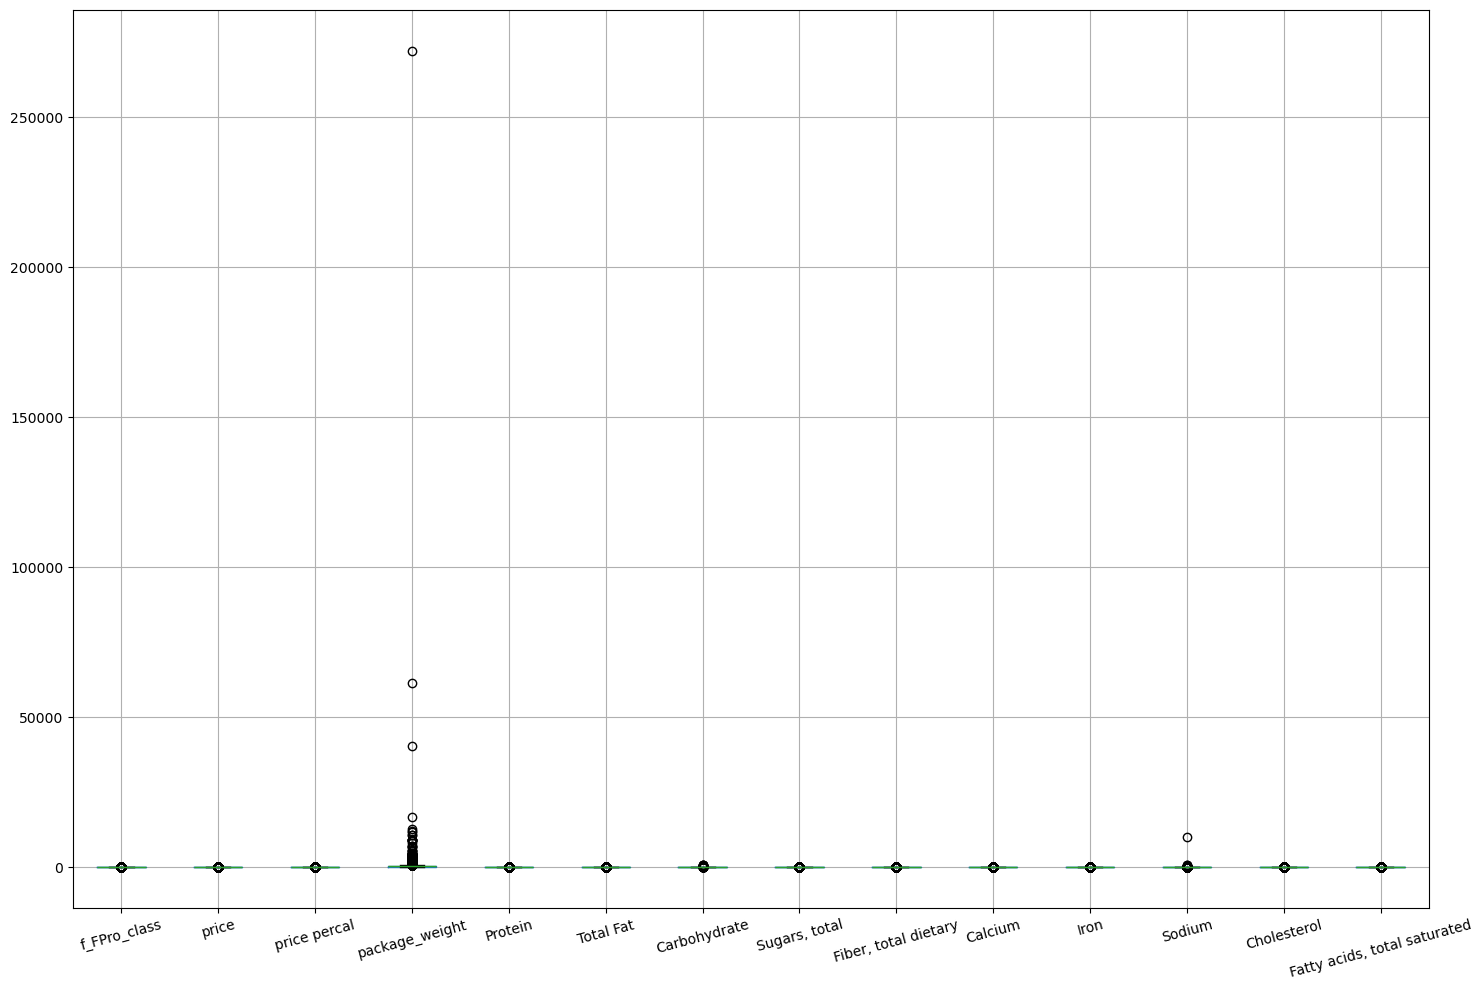

In [ ]:
ax = df.boxplot(figsize=(15, 10))

ax.tick_params(axis='x', rotation=15)

plt.tight_layout()

plt.show()

### Histograms

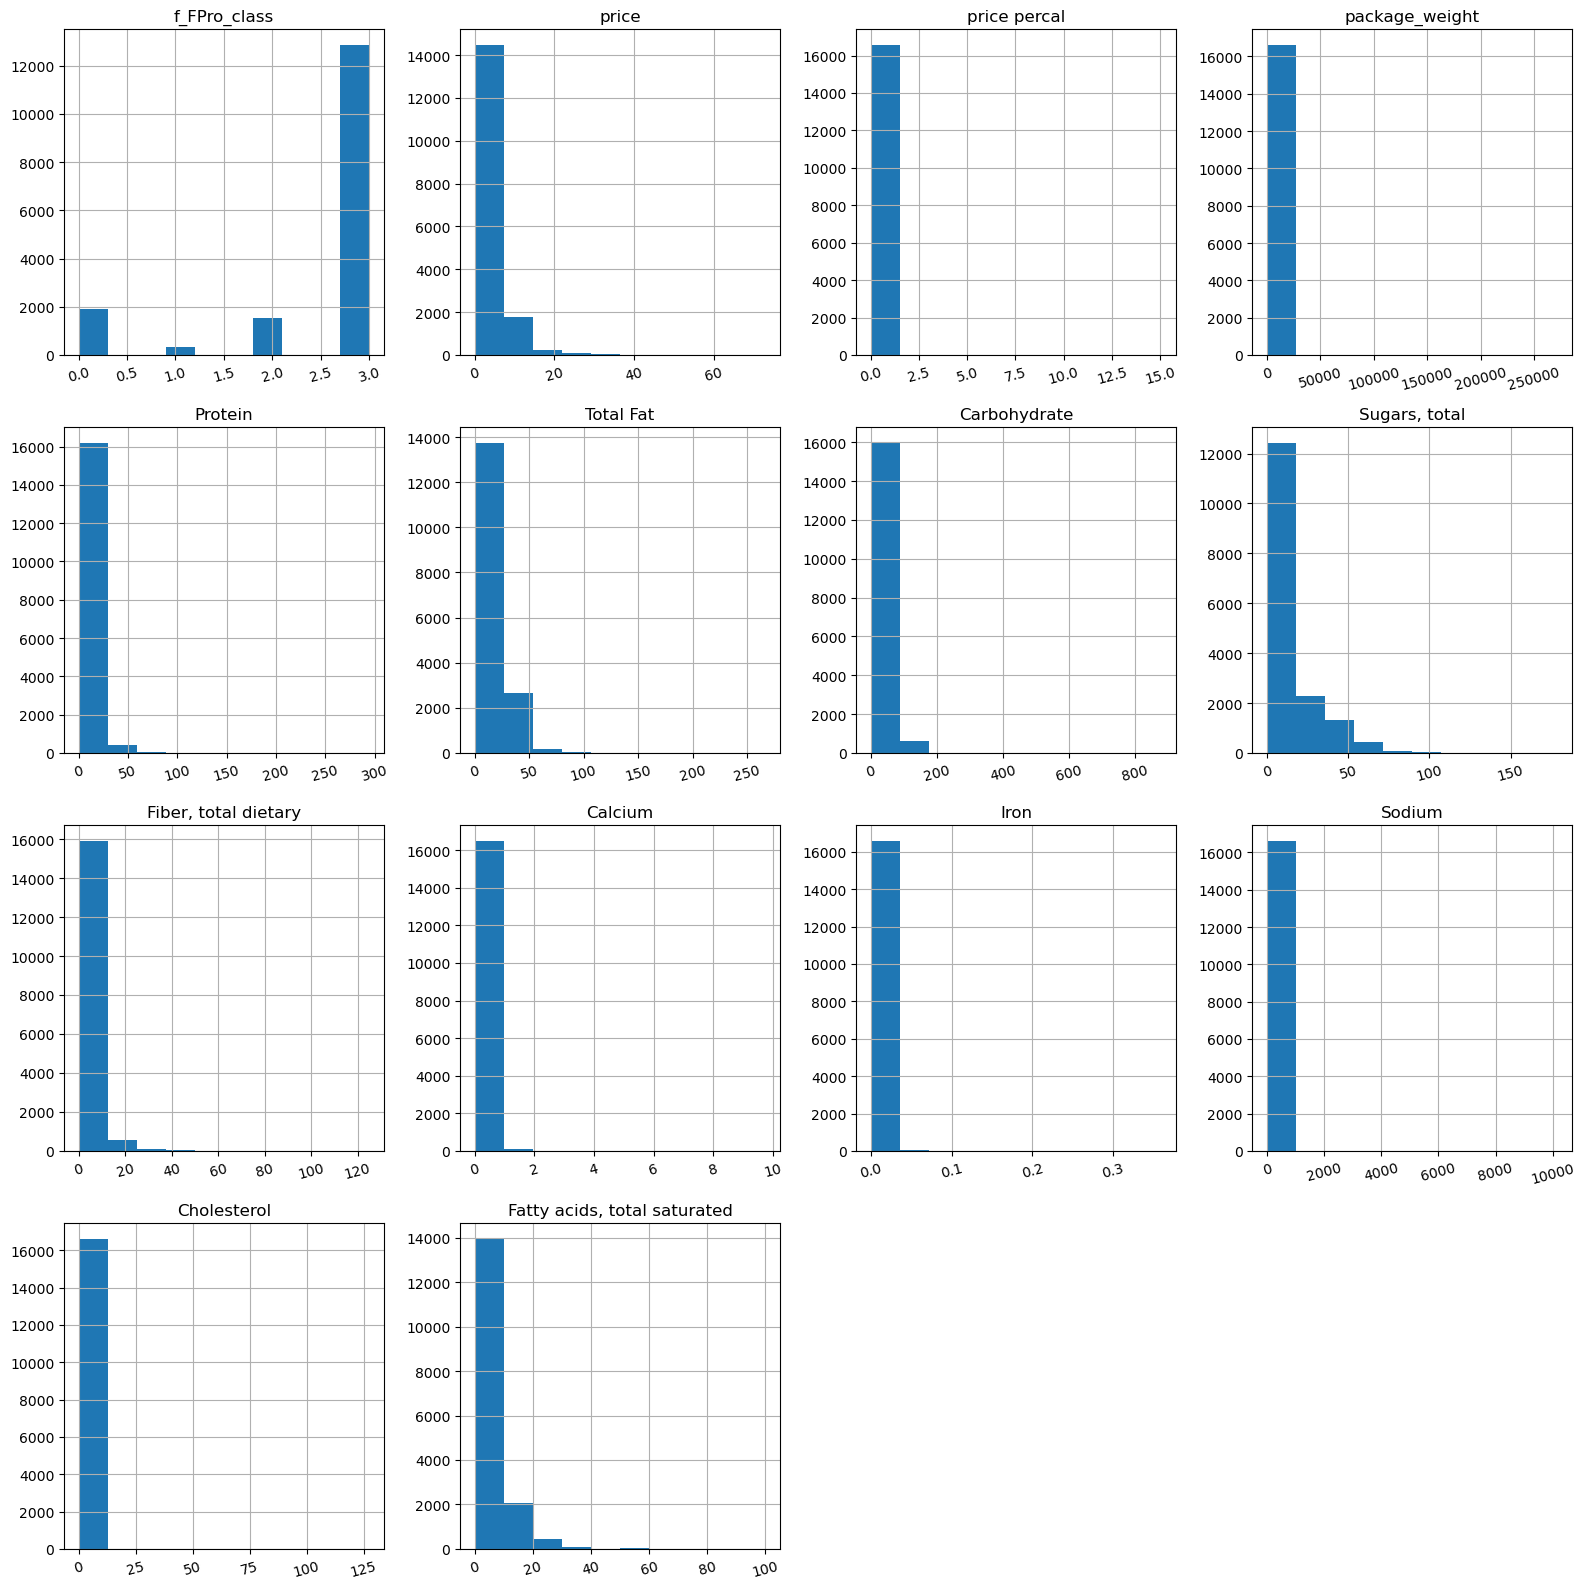

In [ ]:
axes = df.hist(figsize=(16, 16))

for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=15)
    
plt.tight_layout()
plt.show()

# 2. Data Preprocessing

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
numerical_features

['f_FPro_class',
 'price',
 'price percal',
 'package_weight',
 'Protein',
 'Total Fat',
 'Carbohydrate',
 'Sugars, total',
 'Fiber, total dietary',
 'Calcium',
 'Iron',
 'Sodium',
 'Cholesterol',
 'Fatty acids, total saturated']

In [ ]:
categorical_features

['original_ID', 'name', 'store', 'food category', 'brand']

## 2.1 Target Construction

## 2.2 Feature Creation & Selection

### Drop unnecessary features

### Handle missing values

### Encode categorical features

### Extract text features

### Normalize features

## 2.3 Handling Class Imbalance

### Oversampling

### Undersampling

### SMOTE

# 3. Classification models

## Baseline Model

## Model Building

### Decision Tree

### Random Forest

## Model Selection & Evaluation

### Data Split

### Random Seed

### Hyperparameter Tuning

## Evaluation metrics

### Accuracy

### Precision

### Recall

### F1 Score

### ROC-AUC

# 4. Outlier Detection

## Clustering

## Elbow Method